* 18.12.22
* Yaromir Kapustin
* ver0.1

## ДЗ 19
Выполнить Стэкинг, Бэгин и Бустинг. При реализации алгоритмов не использовать готовые решения. 
За сравнение взять CatBoostClassifier как базовая метрика качества. Сравнить результат с реализацией своих ансамблей. 
Для однозначности и интерпретируемости результатов использовать приложенный набор данных. 

При реализации бустинга - просто сокращайте набор данных на котором модель отработала хорошо (правильно предсказанные данные). 

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import roc_auc_score, auc, roc_curve

from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('winequality-white.csv', sep = ';')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
#отсутствующих значений нет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

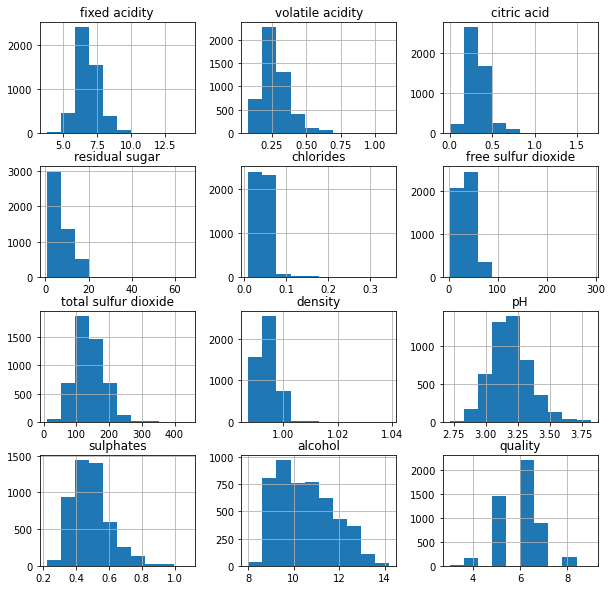

In [5]:
#выбросов нет
df.hist(figsize = (10, 10))

<AxesSubplot:>

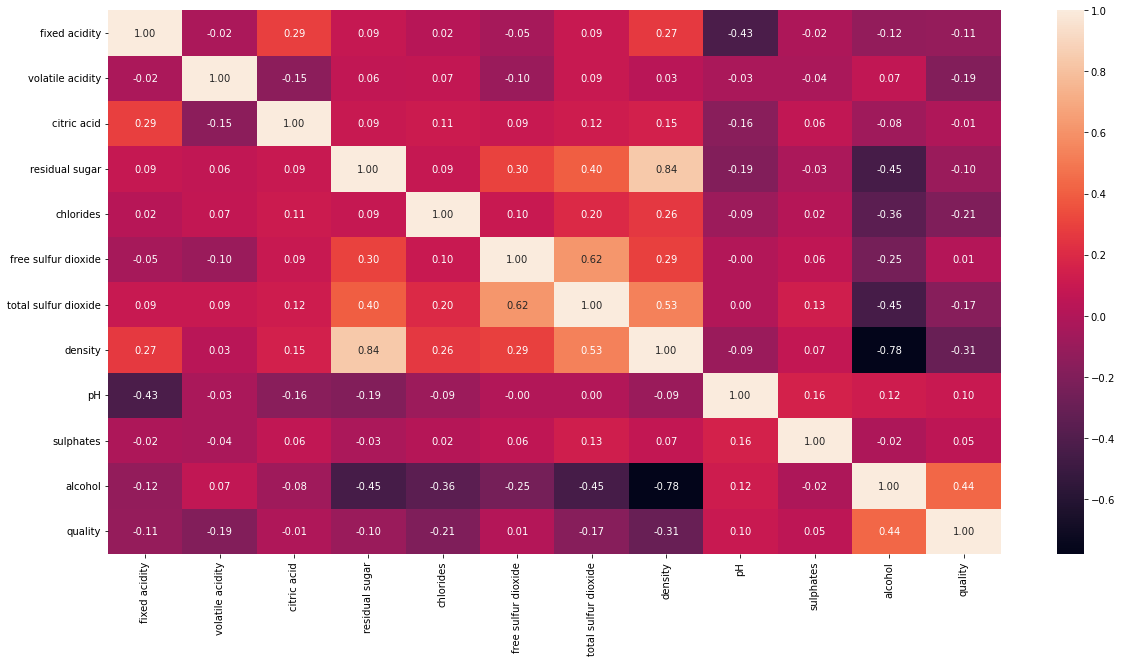

In [6]:
plt.figure(figsize=(20,10))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, fmt=".2f")

### CatBoostClassifier

In [7]:
y = df['quality']
X = df.drop(('quality'), axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [9]:
model = CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           depth=10,
                           loss_function='MultiClass')

In [19]:
cbc_parameters = {'depth'         : [5,10,25,50],
                  'learning_rate' : [0.01,0.04,0.1,0.2,0.5],
                  'iterations'    : [10,100,250,500,1000]
                 }

grid = GridSearchCV(model, cbc_parameters, cv = 3, n_jobs=-1).fit(X_train, y_train)
grid.best_params_

C:\conda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\conda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\conda\lib\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\conda\lib\site-packages\catboost\core.py", line 2339, in _fit
    train_params = self._prepare_train_params(
  File 

0:	learn: 1.8141235	total: 111ms	remaining: 27.8s
1:	learn: 1.7063828	total: 215ms	remaining: 26.7s
2:	learn: 1.6292536	total: 314ms	remaining: 25.8s
3:	learn: 1.5618449	total: 409ms	remaining: 25.2s
4:	learn: 1.5032731	total: 508ms	remaining: 24.9s
5:	learn: 1.4460558	total: 609ms	remaining: 24.8s
6:	learn: 1.3989928	total: 706ms	remaining: 24.5s
7:	learn: 1.3576095	total: 805ms	remaining: 24.4s
8:	learn: 1.3169397	total: 903ms	remaining: 24.2s
9:	learn: 1.2817560	total: 1.01s	remaining: 24.2s
10:	learn: 1.2494448	total: 1.11s	remaining: 24.1s
11:	learn: 1.2195333	total: 1.22s	remaining: 24.2s
12:	learn: 1.1946741	total: 1.32s	remaining: 24.2s
13:	learn: 1.1700809	total: 1.43s	remaining: 24.1s
14:	learn: 1.1473619	total: 1.54s	remaining: 24.1s
15:	learn: 1.1255045	total: 1.64s	remaining: 24s
16:	learn: 1.1059811	total: 1.75s	remaining: 24s
17:	learn: 1.0881255	total: 1.85s	remaining: 23.9s
18:	learn: 1.0714065	total: 1.96s	remaining: 23.8s
19:	learn: 1.0545989	total: 2.06s	remaining: 

163:	learn: 0.4172513	total: 16.3s	remaining: 8.55s
164:	learn: 0.4145858	total: 16.4s	remaining: 8.44s
165:	learn: 0.4121840	total: 16.5s	remaining: 8.34s
166:	learn: 0.4100938	total: 16.6s	remaining: 8.24s
167:	learn: 0.4072243	total: 16.7s	remaining: 8.14s
168:	learn: 0.4047625	total: 16.8s	remaining: 8.04s
169:	learn: 0.4030985	total: 16.9s	remaining: 7.94s
170:	learn: 0.4013690	total: 17s	remaining: 7.84s
171:	learn: 0.3989281	total: 17.1s	remaining: 7.74s
172:	learn: 0.3971742	total: 17.2s	remaining: 7.64s
173:	learn: 0.3952179	total: 17.3s	remaining: 7.54s
174:	learn: 0.3928806	total: 17.4s	remaining: 7.45s
175:	learn: 0.3908071	total: 17.5s	remaining: 7.35s
176:	learn: 0.3876422	total: 17.6s	remaining: 7.25s
177:	learn: 0.3855571	total: 17.7s	remaining: 7.15s
178:	learn: 0.3830900	total: 17.8s	remaining: 7.05s
179:	learn: 0.3815320	total: 17.9s	remaining: 6.95s
180:	learn: 0.3794715	total: 18s	remaining: 6.85s
181:	learn: 0.3774223	total: 18.1s	remaining: 6.75s
182:	learn: 0.37

{'depth': 10, 'iterations': 250, 'learning_rate': 0.1}

In [75]:
#базовая метрика качества
model.fit(X_train, y_train)
print('CatBoostClassifier score: {:.3}'.format(model.score(X_test, y_test)))

0:	learn: 1.6948126	total: 90.2ms	remaining: 22.4s
1:	learn: 1.5317682	total: 181ms	remaining: 22.4s
2:	learn: 1.4297835	total: 273ms	remaining: 22.4s
3:	learn: 1.3491958	total: 363ms	remaining: 22.3s
4:	learn: 1.2790486	total: 456ms	remaining: 22.4s
5:	learn: 1.2173666	total: 549ms	remaining: 22.3s
6:	learn: 1.1680024	total: 639ms	remaining: 22.2s
7:	learn: 1.1285190	total: 730ms	remaining: 22.1s
8:	learn: 1.0917842	total: 824ms	remaining: 22.1s
9:	learn: 1.0588978	total: 925ms	remaining: 22.2s
10:	learn: 1.0302381	total: 1.03s	remaining: 22.5s
11:	learn: 0.9985619	total: 1.14s	remaining: 22.7s
12:	learn: 0.9713724	total: 1.25s	remaining: 22.8s
13:	learn: 0.9482535	total: 1.35s	remaining: 22.8s
14:	learn: 0.9256517	total: 1.45s	remaining: 22.7s
15:	learn: 0.9083223	total: 1.55s	remaining: 22.6s
16:	learn: 0.8952425	total: 1.64s	remaining: 22.4s
17:	learn: 0.8832035	total: 1.73s	remaining: 22.3s
18:	learn: 0.8686810	total: 1.82s	remaining: 22.1s
19:	learn: 0.8575673	total: 1.91s	remain

161:	learn: 0.2038564	total: 15.4s	remaining: 8.34s
162:	learn: 0.2023133	total: 15.4s	remaining: 8.25s
163:	learn: 0.2008805	total: 15.5s	remaining: 8.15s
164:	learn: 0.1991719	total: 15.6s	remaining: 8.06s
165:	learn: 0.1982651	total: 15.7s	remaining: 7.96s
166:	learn: 0.1964887	total: 15.8s	remaining: 7.87s
167:	learn: 0.1950984	total: 15.9s	remaining: 7.78s
168:	learn: 0.1937745	total: 16s	remaining: 7.68s
169:	learn: 0.1927343	total: 16.1s	remaining: 7.59s
170:	learn: 0.1917430	total: 16.2s	remaining: 7.5s
171:	learn: 0.1899835	total: 16.3s	remaining: 7.41s
172:	learn: 0.1887443	total: 16.4s	remaining: 7.31s
173:	learn: 0.1875043	total: 16.5s	remaining: 7.22s
174:	learn: 0.1866466	total: 16.6s	remaining: 7.12s
175:	learn: 0.1849099	total: 16.7s	remaining: 7.03s
176:	learn: 0.1835594	total: 16.8s	remaining: 6.93s
177:	learn: 0.1824654	total: 16.9s	remaining: 6.84s
178:	learn: 0.1818531	total: 17s	remaining: 6.74s
179:	learn: 0.1805457	total: 17.1s	remaining: 6.65s
180:	learn: 0.179

### Staking

In [11]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
dtr_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(gamma="auto", random_state=42, probability=True)


staking_clf = StackingClassifier(
    estimators=[('lr', log_clf), ('dtr', dtr_clf), ('svc', svm_clf)],
    final_estimator=log_clf, n_jobs=-1, verbose=3)

In [12]:
staking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(random_state=42,
                                                   solver='liblinear')),
                               ('dtr', DecisionTreeClassifier(random_state=42)),
                               ('svc',
                                SVC(gamma='auto', probability=True,
                                    random_state=42))],
                   final_estimator=LogisticRegression(random_state=42,
                                                      solver='liblinear'),
                   n_jobs=-1, verbose=3)

In [13]:
staking_clf.transform(X_train)

array([[5.50626049e-04, 1.21030834e-02, 4.46110230e-01, ...,
        8.19762395e-02, 2.12933726e-02, 1.97883767e-03],
       [8.41345591e-03, 3.50192308e-02, 1.89712133e-01, ...,
        7.02302857e-01, 3.44680747e-02, 2.59926040e-03],
       [1.36735279e-03, 4.14137444e-02, 1.83343556e-01, ...,
        7.77035680e-02, 2.31899709e-02, 2.04311836e-03],
       ...,
       [2.62836270e-03, 2.57251093e-02, 1.96056165e-01, ...,
        1.23999061e-01, 2.87267757e-02, 1.31994438e-03],
       [7.02655095e-04, 3.63740998e-03, 1.60025061e-01, ...,
        8.92697091e-02, 1.99405738e-02, 1.70696269e-03],
       [2.15376413e-02, 4.59931125e-02, 2.97936003e-01, ...,
        3.49628244e-01, 1.49617711e-01, 3.13237034e-03]])

In [14]:
for clf in (log_clf, dtr_clf, svm_clf, staking_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, 'score: {:.3}'.format(accuracy_score(y_test, y_pred)))

LogisticRegression score: 0.534
DecisionTreeClassifier score: 0.588
SVC score: 0.565
StackingClassifier score: 0.621


### Bagging

In [54]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
bc_params = {"base_estimator__max_depth": [3,5,10,20],
             "base_estimator__max_leaf_nodes": [1,3,5,7,10],
             'max_samples': [0.5,0.7,1.0],
             'n_estimators': [2,5,10,20],
            }


bc_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=5, verbose=1).fit(X_train, y_train)
bc_gs.best_params_

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


In [76]:
print(bag_clf, 'BaggingClassifier score: {:.3}'.format(accuracy_score(y_test, y_pred)))

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42) BaggingClassifier score: 0.639


#### ExtraTreesClassifier

In [74]:
et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(X_train, y_train)

y_pred_et_clf = et_clf.predict(X_test)
print('ExtraTreesClassifier score: {:.3}'.format(accuracy_score(y_test, y_pred_et_clf)))

ExtraTreesClassifier score: 0.68


### Boosting

In [80]:
#AdaBoostClassifier
clf_ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42)

clf_ada.fit(X_train, y_train)
y_pred_clf_ada = clf_ada.predict(X_test)
print('AdaBoostClassifier score: {:.3}'.format(accuracy_score(y_test, y_pred_clf_ada)))

AdaBoostClassifier score: 0.595


In [84]:
#GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier(random_state=42)

clf_gbc.fit(X_train, y_train)
y_pred_clf_gbc = clf_gbc.predict(X_test)
print('GradientBoostingClassifier score: {:.3}'.format(accuracy_score(y_test, y_pred_clf_gbc)))

GradientBoostingClassifier score: 0.586


# Результаты

CatBoostClassifier score: 0.68 (референс)

LogisticRegression score: 0.534

DecisionTreeClassifier score: 0.588

SVC score: 0.565

ExtraTreesClassifier score: 0.68

StackingClassifier score: 0.621

BaggingClassifier score: 0.639

AdaBoostClassifier score: 0.595

GradientBoostingClassifier score: 0.586